<p align="left">
  <a href="https://colab.research.google.com/github/fernandoarcevega/AI_Workshop/blob/main/Day_2/05_MLP_autoencoder/05_MLP_autoencoder.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200">
  </a>
</p>

In [ ]:
################################################
# Author 1: Wilfrido Gómez-Flores (CINVESTAV)  #
# Author 2: Fernando Arce-Vega (CIO)           #
# e-mail 1: wilfrido.gomez@cinvestav.mx        #
# e-mail 2: farce@cio.mx                       #
# Date:     nov/03/2025                        #
# Subject:  Autoencoder - MLP                  #
################################################

In [ ]:
# Change: Runtime to GPU

In [ ]:
# Libraries
import numpy as np                                                    # Numerical array operations
import matplotlib.pyplot as plt                                       # Data plotting/visualization
import tensorflow as tf                                               # Machine learning

In [ ]:
# Download MNIST
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Data preprocessing
x_train = x_train.reshape(len(x_train), 28*28).astype('float32')
x_test = x_test.reshape(len(x_test), 28*28).astype('float32')

# Data normalization
x_train /= 255.0
x_test /= 255.0

# Check feature and targets shapes for training and testing
print(f'Training features shape:   {x_train.shape}')
print(f'Testing features shape:    {x_test.shape}')

Training features shape:   (60000, 784)
Testing features shape:    (10000, 784)


Model summary




Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 64)             │       576,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       575,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,151,568 (4.39 MB)

 Trainable params: 1,150,544 (4.39 MB)

 Non-trainable params: 1,024 (4.00 KB)

Graphic representation


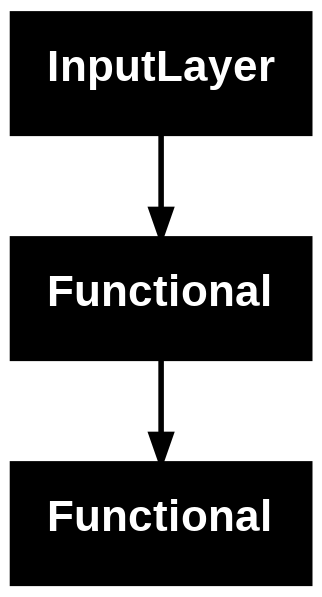

In [ ]:
# Encoder
encoder_input = tf.keras.layers.Input(shape=(784,))
x = tf.keras.layers.Dense(units=512, activation='relu')(encoder_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units=256, activation='relu')(x)
x = tf.keras.layers.Dense(units=128, activation='relu')(x)
x = tf.keras.layers.Dense(units=64, activation='relu')(x)
encoded = tf.keras.layers.Dropout(0.2)(x)
encoder = tf.keras.models.Model(encoder_input, encoded, name='encoder')

# Decoder
decoder_input = tf.keras.layers.Input(shape=(64,))
x = tf.keras.layers.Dense(units=128, activation='relu')(decoder_input)
x = tf.keras.layers.Dense(units=256, activation='relu')(x)
x = tf.keras.layers.Dense(units=512, activation='relu')(x)
decoded = tf.keras.layers.Dense(units=784, activation='sigmoid')(x)
decoder = tf.keras.models.Model(decoder_input, decoded, name='decoder')

# Autoencoder
model = tf.keras.models.Model(encoder_input, decoder(encoder(encoder_input)), name='autoencoder')


# Model description
print('Model summary\n\n')
model.summary()

# Graphic representation
print('Graphic representation')
tf.keras.utils.plot_model(model)

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 5e-01,
    decay_steps = 2500,
    decay_rate = 0.75,
    staircase=True)

In [ ]:
# Compile model
adam = tf.keras.optimizers.Adam(
    learning_rate = lr_schedule,
    beta_1=0.95,
    beta_2=0.99,
    epsilon=1e-01)

model.compile(optimizer=adam, loss='mean_squared_error')

In [ ]:
# Train the autoencoder
epochs = 40

history = model.fit(x_train, x_train,
                          epochs=epochs,
                          batch_size=512,
                          shuffle=True,
                          validation_split=0.2)

Epoch 1/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1804 - val_loss: 0.0949
Epoch 2/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0659 - val_loss: 0.0716
Epoch 3/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0583 - val_loss: 0.0552
Epoch 4/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0509 - val_loss: 0.0448
Epoch 5/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0445 - val_loss: 0.0391
Epoch 6/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0406 - val_loss: 0.0359
Epoch 7/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0379 - val_loss: 0.0333
Epoch 8/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0358 - val_loss: 0.0314
Epoch 9/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0343 - val_loss: 0.0299
Epoch 10/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0330 - val_loss: 0.0288
Epoch 11/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0318 - val_loss: 0.0274
Epoch 12/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0308 - val_

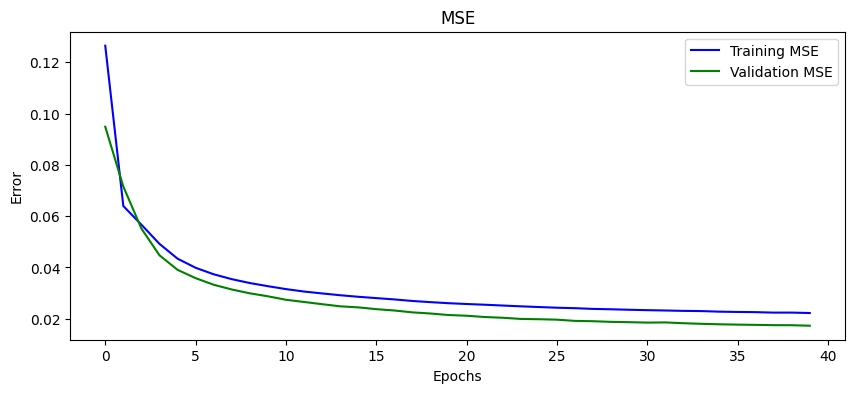

In [ ]:
# Training and validation graphs
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epocas = np.arange(len(training_loss))

plt.figure(figsize = (10, 4))
plt.plot(epocas, training_loss, color='blue', label='Training MSE')
plt.plot(epocas, validation_loss, color = 'green', label='Validation MSE')
plt.title('MSE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
# Model prediction
y_pred = model.predict(x_test)
y_pred = np.reshape(y_pred, (len(y_pred), 28, 28))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


Test images



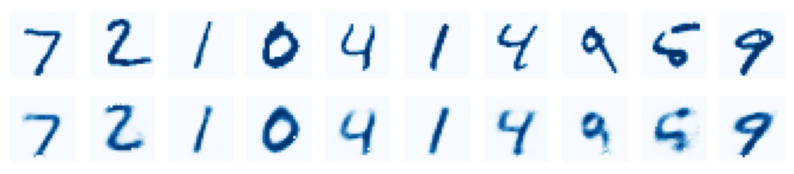

In [ ]:
# Data visualization
ncols = 10
nrows = 2

# Create figure
fig, axs = plt.subplots(figsize=(10, 2))
plt.axis('off')

print('Test images\n')

for i in range(ncols):
  img = x_test[i].reshape((28, 28))

  axs = fig.add_subplot(nrows, ncols, i + 1)
  axs.imshow(img, cmap='Blues')
  axs.axis('off')

  axs = fig.add_subplot(nrows, ncols, ncols + i + 1)
  axs.imshow(y_pred[i], cmap='Blues')
  axs.axis('off')

plt.show()